<center><font color='Red'><h1> Image Classification
</h1></font></center>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import math

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## <center> Loading Car   and Plane  dataset </center>

In [4]:
train_cars_dir = r'C:\Users\BINAYA\Desktop\AI-SEM-2\dataset\train\cars'  
train_planes_dir = r'C:\Users\BINAYA\Desktop\AI-SEM-2\dataset\train\planes'  
validation_cars_dir = r'C:\Users\BINAYA\Desktop\AI-SEM-2\dataset\test\cars'  
validation_planes_dir = r'C:\Users\BINAYA\Desktop\AI-SEM-2\dataset\test\planes' 
train_dir=r"C:\Users\BINAYA\Desktop\AI-SEM-2\dataset\train"
validation_dir=r"C:\Users\BINAYA\Desktop\AI-SEM-2\dataset\test"

In [5]:
num_cars_tr = len(train_cars_dir)
num_planes_tr = len(train_planes_dir)

num_cars_val = len(validation_cars_dir)
num_planes_val = len(validation_planes_dir)

In [6]:
num_cars_tr

51

In [7]:
total_train = num_cars_tr + num_planes_tr
total_val = num_cars_val + num_planes_val

In [8]:
total_train

104

In [9]:
total_val

102

In [10]:
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

Image data increase is a technique which can be used to artificially expand the size of a training dataset by creating updated image versions in the dataset. 

The Keras deep learning neural network library offers the ability to suit models by that image data through the ImageDataGenerator class

Generate batches of tensor image data with real-time data augmentation.

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 400 images belonging to 2 classes.


.flow_from_directory():
Takes the path to a directory, and produces incremented / normalized data batches. Batches on yields indefinitely, in an infinite loop.

In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 100 images belonging to 2 classes.


In [14]:
from PIL import Image
sample_training_images, _ = next(train_data_gen)

The next feature returns the dataset to a array.The return value of next function is in form of (x_train, y_train) where x_train is training features and y_train, its labels.Discard the labels just to display images of the training.

In [15]:
# This feature will map images in the form of a grid with 1 row and 5 columns where each column has images placed in it.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

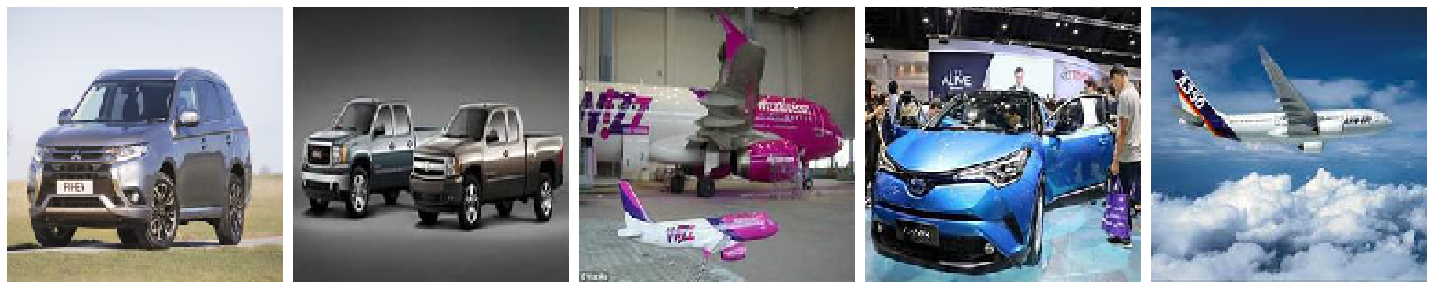

In [16]:
plotImages(sample_training_images[:5])

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

A 2-D convolutional layer applies sliding convolutional filters to the input. The layer convolves the input by moving the filters along the input vertically and horizontally and computing the dot product of the weights and the input, and then adding a bias term.


Parameters:--
Filters: Integer, the output space dimensional (i.e., number of output filters in the convolution).

Kernel_size: A 2-integer integer or tuple / list, defining the height and width of the 2D convolution frame. For all spatial dimensions, can be a single integer to determine the same value.
    
Padding: Either of "true" (case-insensitive) or "same" Remember that "same" is somewhat inconsistent with measures through backends! = 1
    
Activation functions in Neural Networks is mathematical equations, which evaluate a neural network's performance.Activation fuction determines whether or not to activate a neuron by calculating weighted sum and adding more bias with it. Activation functions also help to normalize each neuron's output to a range of between 1 and 0 or-1 and 1.The activation function's aim is to introduce non linearity into a neuron's output.

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a relu activation function

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

View all the layers of the network using the model's summary method:

Using the fit_generator method of the ImageDataGenerator class to train the network.

In [20]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=30,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 1 steps
Epoch 1/30
4/4 [==============================] - 3s 791ms/step - loss: 2.7749 - accuracy: 0.5250 - val_loss: 2.3748 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 3s 684ms/step - loss: 1.5347 - accuracy: 0.5225 - val_loss: 0.8841 - val_accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 3s 699ms/step - loss: 0.7154 - accuracy: 0.5000 - val_loss: 0.5842 - val_accuracy: 0.5000
Epoch 4/30
4/4 [==============================] - 3s 656ms/step - loss: 0.5887 - accuracy: 0.5000 - val_loss: 0.5057 - val_accuracy: 0.5000
Epoch 5/30
4/4 [==============================] - 3s 655ms/step - loss: 0.5270 - accuracy: 0.5250 - val_loss: 0.4279 - val_accuracy: 0.5900
Epoch 6/30
4/4 [==============================] - 3s 667ms/step - loss: 0.4051 - accuracy: 0.7475 - val_loss: 0.2967 - val_accuracy: 0

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(30)

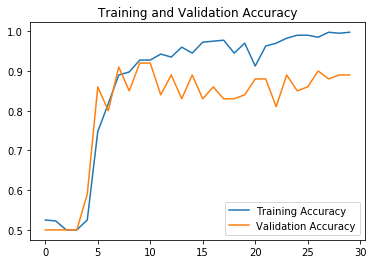

In [22]:
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')
plt.show()

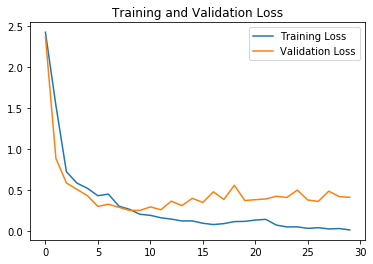

In [23]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()